In [24]:
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]
features

['SepalLengthCm', 'PetalLengthCm']

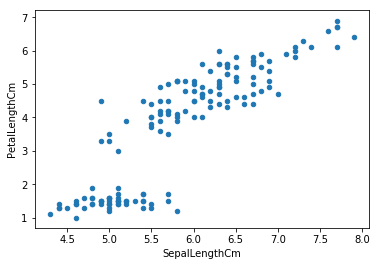

In [8]:
df[features].plot.scatter(0, 1)

In [29]:
X = df[features].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [17]:
k = 3

In [18]:
kmeans = cluster.KMeans(n_clusters= k, random_state=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [19]:
y = kmeans.predict(X)

In [20]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

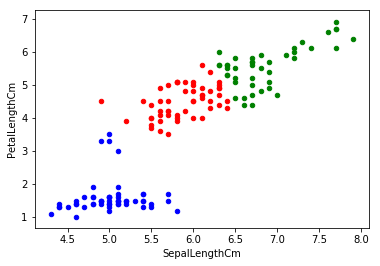

In [26]:
fig, ax = plt.subplots()
colors = ["red", "blue", "green"]
for i, color in enumerate(colors):
    df[features][y==i].plot.scatter(0, 1, color = colors[i], ax = ax)

In [27]:
kmeans.inertia_

43.03887066676178

In [31]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers = pd.DataFrame(centers, columns = features)
centers

,SepalLengthCm,PetalLengthCm
0,5.873585,4.492453
1,5.005556,1.598148
2,6.858140,5.567442


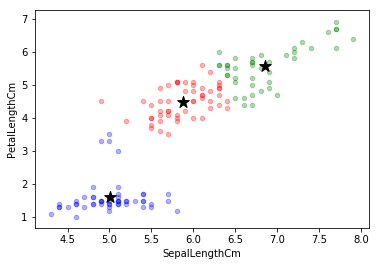

In [37]:
fig, ax = plt.subplots()
colors = ["red", "blue", "green"]
for i, color in enumerate(colors):
    df[features][y==i].plot.scatter(0, 1, color = colors[i], ax = ax, alpha = 0.3)

centers.plot.scatter(0, 1, ax = ax, marker = "*", s = 150, color = "black")

In [42]:
df["cluster"] = y

In [43]:
df["distance"] = 0
for i in range(k):
    centroid = kmeans.cluster_centers_[i, :].reshape(-1, 2)
    points = X[y==i]
    df["distance"][y==i] = metrics.euclidean_distances(points, centroid)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [44]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,distance,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.160599,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.170454,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.407209,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.494562,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.112879,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0.481437,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0.504156,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0.056217,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0.742340,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0.139547,1


In [47]:
df.groupby("cluster").distance.agg(["mean", "min", "max", "count"])

,mean,min,max,count
cluster,,,,
0,0.435640,0.153235,1.179680,53
1,0.402361,0.006813,1.081522,54
2,0.558198,0.080209,1.348258,43


In [48]:
import numpy as np

In [49]:
np.percentile(df.distance, [90, 99])

array([0.80913963, 1.23918885])

In [50]:
df["anamoly"] = df.distance >1.23918885

In [52]:
df[df.anamoly == True]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,distance,cluster,anamoly
118,119,7.7,2.6,6.9,2.3,Iris-virginica,1.270726,2,True
131,132,7.9,3.8,6.4,2.0,Iris-virginica,1.348258,2,True


In [53]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,distance,cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,0.458793,0.933333
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.277395,0.799888
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.006813,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.249070,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,0.421412,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,0.605201,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,1.348258,2.000000
